# Deep Learning Theoretical Aspects - Assignment 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sklearn
%matplotlib inline

Much of the power of neural networks comes from the nonlinearity that is inherited in activation functions.  
Show that a network of N layers that uses a linear activation function can be reduced into a network with just an input and output layers.


Because a linear combination of linear functions is just a linear function.

There are N layers, the input into the nth layer is Xn, the output of the Nth layer will be f(Xn) = a +bXn, and if Xn = f(Xn-1) = a + b(Xn-1) and onward back to X1.

Mathematically speaking the Sum Rule tells us that the derivative of the sum of two functions is the same as the sum of the derivatives, and the  

### Derivatives of Activation Functions
Compute the derivative of these activation functions:

1 Sigmoid
<img src="https://cdn-images-1.medium.com/max/1200/1*Vo7UFksa_8Ne5HcfEzHNWQ.png" width="150">

(e^t)/((1 + e^t)^2) or sigmoid(x) * (1 - sigmoid(x)) 

2 Relu 

<img src="https://cloud.githubusercontent.com/assets/14886380/22743194/73ca0834-ee54-11e6-903f-a7efd247406b.png" width="200">

f′(x)={1 if x>0, otherwise 0}

3 Softmax
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e348290cf48ddbb6e9a6ef4e39363568b67c09d3" width="250">

Softmax derivative:
<img src="https://eli.thegreenplace.net/images/math/5470218612381816a8c9a897d43201757560e646.svg" width="250">
<img src="https://eli.thegreenplace.net/images/math/f776365373202f727625c0be825d55a2fde47882.svg" width="250">

### Back Propagation
Use the delta rule and backprop to compute the derivatives for these computations:

In [66]:
x1, x2, x3, x4 = 1, 3, -2, 2


```
z = x1 + 5*x2 - 3*x3^2
```

In [140]:
dx1 = 1
dx2 = 5
dx3 = -6*x3
dz = [dx1, dx2, dx3]
print(dz)

[1, 5, 12]


```
z = x1*(x2-4) + exp(x3^2) / 5*x4^2
```

In [141]:
dx1 = x2 - 4
dx2 = x1
dx3 = 2*x3*np.exp(x3^2)/(5*x4^2)
dx4 = -2*np.exp(x3^2)/(5*x4^3)
dz = [dx1, dx2, dx3, dx4]
print(dz)

[-1, 1, -0.00915781944436709, -0.004070141975274262]


```
z = 1/x3 + exp( (x1+5*(x2+3)) ^2 )
```

In [77]:
dx1 = 2*(x1+5*(x2+3))*np.exp((x1+5*(x2+3))^2)
dx2 = 10*(5*(x2+3)+x1)*np.exp((x1+5*(x2+3))^2)
dx3 = -1/(x3^2)
dz = [dx1, dx2, dx3]
print(dz)

[243742726422930.6, 1218713632114653.0, 0.25]


### Sample convolutions
Consider the following convolution filters:
```python
k1 = [ [0 0 0], [0 1 0], [0 0 0] ]
k2 = [ [0 0 0], [0 0 1], [0 0 0] ]
k3 = [ [-1-1 -1], [-1 8 -1], [-1 -1 -1] ]
k4 = [ [1 1 1], [1 1 1], [1 1 1] ] / 9
```

Can you guess what each of them computes?

#### Apply to arrays
Apply the convolutions above to the following array:


In [4]:
x = np.array([[-1, -3, -4,  0, -1],
       [ 2, -2, -4,  0, -2],
       [-3, -2,  2,  2,  3],
       [ 0, -3, -4, -4, -2],
       [-4, -2,  2,  0,  1]])

What would be the output dimensions in these cases?
1. No padding, stride of 1
1. No padding, stride of 2
1. Zero padding, stride of 1
1. Zero padding, stride of 2

1. 3x3
2. 2x2
3. 5x5
4. 3x3

Consider convolutions with kernels of size 3x3, 5x5, 7x7 etc.

Come up with an equation for the dimension of the output image after a convolution layer. Your equation should also take into account padding and the stride.

dimension = (input_width - filter_width + 2 * padding)/stride + 1

#### Apply to images
Apply the convolution filters above on the image. Plot the results:

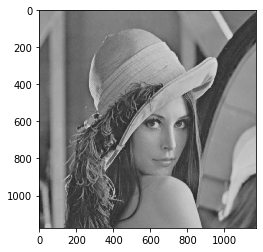

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
im = mpimg.imread('lena.jpg')
plt.imshow(im);

In [57]:
from scipy.ndimage.filters import convolve

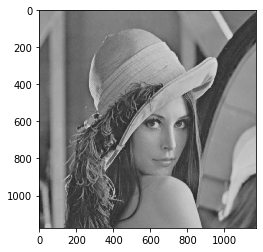

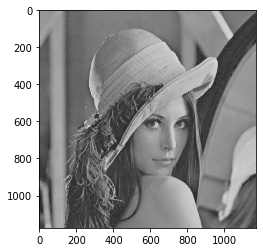

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


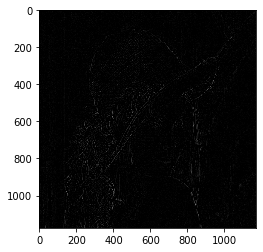

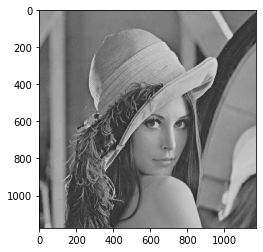

In [65]:
k1 = np.array([ [0, 0, 0], [0, 1, 0], [0, 0, 0] ])
k2 = np.array([ [0, 0, 0], [0, 0, 1], [0, 0, 0] ])
k3 = np.array([ [-1, -1, -1], [-1, 8, -1], [-1, -1, -1] ])
k4 = np.array([ [1, 1, 1], [1, 1, 1], [1, 1, 1] ]) / 9

conv_filters = [k1, k2, k3, k4]

for f in conv_filters:
    channels = []
    for channel in range(im.shape[2]):
        c = im[:,:,channel]
        c = c.astype(np.int16)
        conv = convolve(c, f)
        channels.append(conv)
    img = np.dstack((channels[0], channels[1], channels[2]))
    plt.imshow(img)
    plt.show();


### Network dimensions
Write below the dimensions and number of parameters in each layer of this network for the MNIST data:

- Convolutional Layer #1: Applies 32 5x5 filters (extracting 5x5-pixel subregions), with ReLU activation function
- Pooling Layer #1: Performs max pooling with a 2x2 filter and stride of 2 (which specifies that pooled regions do not overlap)
- Convolutional Layer #2: Applies 64 5x5 filters, with ReLU activation function
- Pooling Layer #2: Again, performs max pooling with a 2x2 filter and stride of 2
- Dense Layer #1: 1,024 neurons, with dropout regularization rate of 0.4 (probability of 0.4 that any given element will be dropped during training)
- Dense Layer #2 (Logits Layer): 10 neurons, one for each digit target class (0–9).


MNIST picture is 28x28
Convolutional Layer 1 - output: (((28 - 5)/1) + 1)^2 * 32 = 24x24x32, parameters: ((5x5) + 1)x32 = 832

Pooling Layer 1 - output: (((24 - 2)/2) + 1)^2 * 32 = 12x12x32, parameters: 0

Convolutional Layer 2 - output: (((12 - 5)/1) + 1)^2 * 64 = 8x8x64, parameters: ((5x5x32)+1)x64 = 51,264

Pooling Layer 2 - output: (((8 - 2)/2) + 1)^2 * 64 = 4x4x64, parameters: ((2x2) + 1)x64 = 320
                       
Dense Layer 1 - output: 1024x1, parameters: 4x4x64x1024 = 1,048,576
                       
Dense Layer 2 - output: 10x1, parameters: 1024x10 = 10,240

### Learning in biological neurons
Try to come up with a learning algorithm for a neural network that replaces back propagation, and mimicks the operation of biological neurons.

Before we can think of a more biologically plausible algorithm to replace backpropagation we need to understand the difference between learning in biological neurons and through backpropagation.

This post has a brief summary: https://psychology.stackexchange.com/questions/16269/is-back-prop-biologically-plausible

To make a biologically plausible alternative to backprop we'd need an algorithm that doesn't backpropagate the error through the same path as the activation function, which would mean getting rid of the derivative.

It would also have to figure out how to make the feedback process non-linear and have a time-delay since signals take time to move through the brain.

### Puppy or bagel?
We've seen in class the (hopefully) funny examples of challenging images (Chihuahua or muffin, puppy or bagel etc.). 

Let's say you were asked by someone to find more examples like that. You are able to call the 3 neural networks that won the recent ImageNet challenges, and get their predictions (the entire vector of probabilities for the 1000 classes).  

Describe methods that might assist you in finding more examples.

Perhaps looking for images that have a small difference between the max and 2nd max probability, indicating that the network was not particularly confident in its class assignment. Another possibility would be to take images where the three networks cannot agree on their top-1 votes, or vote 2-1 or 1-1-1 on different labels, Minority Report style.

#### Gradient Checking
When computing the gradient yourself, it's recommended to manually check the gradient to make sure you haven't made an error.  
We'll use the following equation for this, which produces more robust results than the standard definition of a derivative:


<img src="http://ufldl.stanford.edu/wiki/images/math/a/2/3/a23bea0ab48ded7b9a979b68f6356613.png" width="250">

We'll numerically approximate it using:

<img src="http://ufldl.stanford.edu/wiki/images/math/4/8/a/48a000aed96c8595fcca2a45f48343ce.png" width="250">

Write a function that evaluates the gradient locally and use it to numerically compute the gradient along several randomly chosen dimensions. Compare your results with your analytically computed gradient. The numbers should match almost exactly along all dimensions.

In [142]:
def numeric_approximation(func, theta):
    eps = 1e-9
    _thetaplus = [e+eps for e in theta]
    _thetaminus = [e-epsilon for e in theta]
    result = (func(*_thetaplus) - func(*_thetaminus))/(2 * eps)
    return result

def function(x1, x2, x3, x4):
    return x1*(x2-4) + (np.exp(x3**2) / (5*x4**2))

In [143]:
numeric_approximation(function, [x1,x2,x3,x4])

-13.649538610494005